## Install Multi-Task Cascaded Convolutional Neural Network, or MTCNN, for face detection

In [1]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.6 MB/s eta 0:00:0000:0100:01


# Load libraries

In [3]:
import numpy as np
from PIL import Image
from mtcnn.mtcnn import MTCNN
import os
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # To Filter out INFO and WARNING logs (show ERROR only).

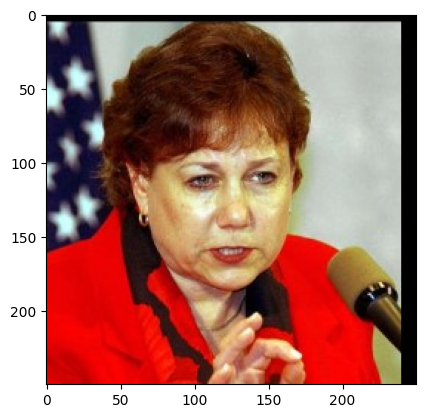

In [4]:
img = cv.imread("/kaggle/input/vggface-using-tripletloss/dataset/dataset/Ann_Veneman/Ann_Veneman_0006.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
detector = MTCNN()
results = detector.detect_faces(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


In [7]:
results 

[{'box': [72, 65, 92, 119],
  'confidence': 0.9999481439590454,
  'keypoints': {'left_eye': (105, 110),
   'right_eye': (146, 110),
   'nose': (131, 139),
   'mouth_left': (110, 161),
   'mouth_right': (141, 160)}}]

In [8]:
results[0]['box']

[72, 65, 92, 119]

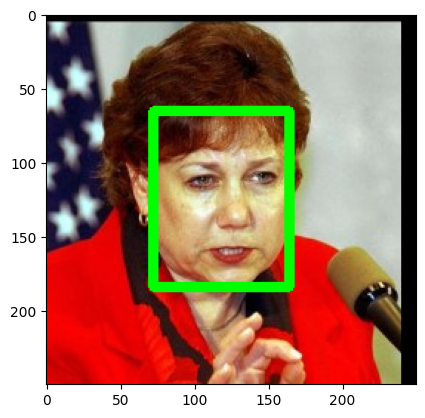

In [9]:
# We need just the box to draw a rectangle on the face 
x,y,w,h = results[0]['box']
img = cv.rectangle(img , (x,y), (x+w,y+h), (0,255,0), 6)
plt.imshow(img)

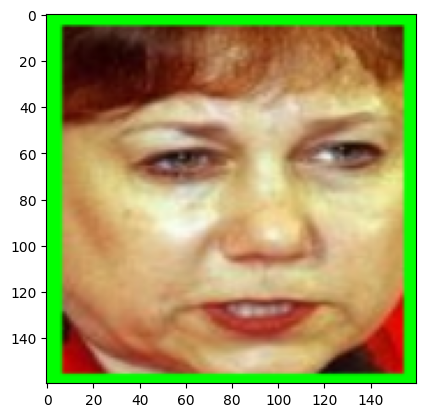

In [10]:
face = img[y:y+h, x:x+w]
# Facenet take image in size of (160,160) so we will resize the image
face = cv.resize(face, (160,160))
plt.imshow(face)

In [11]:
face

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

# Automate image preprocessing on the dataset

In [12]:
class FacesPreprocessing:
    def __init__(self,directory):
        self.directory = directory
        self.size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
        
     
    def extract_face(self,path):
        img = cv.imread(path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y: y+h, x:x+w]
        face_arr = cv.resize(face, self.size)
        
        return face_arr
    
    def load_faces(self, dir): 
        faces = []
        list_of_images = os.listdir(dir)
        for image_name in list_of_images:
            try:
                path = os.path.join(dir, image_name)
                single_face = self.extract_face(path)
                faces.append(single_face)
            except Exception as e:
                pass

        return faces
    
    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory + '/' + sub_dir
            faces = self.load_faces(path)
            labels = [sub_dir for _ in range(len(faces))]
            print(f"Loaded successfully:{len(labels)}")
            self.X.extend(faces)
            self.Y.extend(labels)
            
        return np.asarray(self.X), np.asarray(self.Y)  
    

In [ ]:
faceLoading = FacesPreprocessing('/kaggle/input/vggface-using-tripletloss/dataset/dataset')
X,Y = faceLoading.load_classes()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-07-29 04:41:09.550564: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.15836, expected 7.18173
2024-07-29 04:41:09.550619: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.24442, expected 7.26779
2024-07-29 04:41:09.550633: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 8.72454, expected 7.74791
2024-07-29 04:41:09.550641: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.86334, expected 6.88671
2024-07-29 04:41:09.550649: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.93387, expected 5.95724
2024-07-29 04:41:09.550657: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.27168, expected 6.29505
2024-07-29 04:41:09.550665: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.30862, expected 5.33199
2024-07-29 04:41:09.550683: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


2024-07-29 04:41:11.488626: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 8.30888, expected 7.34672
2024-07-29 04:41:11.488696: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.12641, expected 6.16424
2024-07-29 04:41:11.488713: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.98126, expected 7.0191
2024-07-29 04:41:11.488725: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.94229, expected 4.98013
2024-07-29 04:41:11.488735: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.65353, expected 4.69137
2024-07-29 04:41:11.488746: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.82183, expected 5.85967
2024-07-29 04:41:11.488758: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 8.07916, expected 7.117
2024-07-29 04:41:11.488768: E external/local_xla/xla/serv

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

2024-07-29 04:41:13.293390: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 493: 7.92139, expected 7.00547
2024-07-29 04:41:13.293449: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 512: 7.8738, expected 6.95787
2024-07-29 04:41:13.293466: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 513: 7.77988, expected 6.86395
2024-07-29 04:41:13.293485: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 515: 7.66529, expected 6.74936
2024-07-29 04:41:13.293497: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 520: 7.98796, expected 7.07203
2024-07-29 04:41:13.293510: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 525: 7.83287, expected 6.91694
2024-07-29 04:41:13.293522: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 537: 8.00066, expected 7.08473
2024-07-29 04:41:13.293534: E external/loc

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


2024-07-29 04:41:16.174626: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.37764, expected 4.67112
2024-07-29 04:41:16.174689: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 4.95102, expected 4.24449
2024-07-29 04:41:16.174702: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 24: 5.64476, expected 4.93824
2024-07-29 04:41:16.174710: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.06045, expected 5.35393
2024-07-29 04:41:16.174718: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.88429, expected 5.17777
2024-07-29 04:41:16.174727: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.78418, expected 5.07766
2024-07-29 04:41:16.174734: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 39: 5.43884, expected 4.73231
2024-07-29 04:41:16.174742: E external/local_xla/x

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

2024-07-29 04:41:17.311855: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 976: 5.91611, expected 5.18903
2024-07-29 04:41:17.311911: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 995: 6.03749, expected 5.31041
2024-07-29 04:41:17.311925: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 996: 5.98649, expected 5.25941
2024-07-29 04:41:17.311939: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 997: 5.79355, expected 5.06647
2024-07-29 04:41:17.311956: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 998: 6.1248, expected 5.39772
2024-07-29 04:41:17.311966: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 999: 5.96055, expected 5.23347
2024-07-29 04:41:17.311976: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1004: 6.16067, expected 5.43359
2024-07-29 04:41:17.311988: E external/lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

2024-07-29 04:41:18.427502: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.2595, expected 6.36441
2024-07-29 04:41:18.427558: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.81092, expected 6.91583
2024-07-29 04:41:18.427569: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.30463, expected 6.40954
2024-07-29 04:41:18.427578: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.05264, expected 6.15755
2024-07-29 04:41:18.427587: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.00929, expected 6.1142
2024-07-29 04:41:18.427596: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 6.10681, expected 5.21172
2024-07-29 04:41:18.427604: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.45392, expected 5.55883
2024-07-29 04:41:18.427613: E external/local_xla/xla/serv

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-07-29 04:41:31.071703: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4232: 8.06843, expected 7.11307
2024-07-29 04:41:31.071754: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4233: 6.40873, expected 5.45336
2024-07-29 04:41:31.071763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4234: 6.38862, expected 5.43325
2024-07-29 04:41:31.071771: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4235: 6.48927, expected 5.5339
2024-07-29 04:41:31.071779: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4236: 7.78845, expected 6.83308
2024-07-29 04:41:31.071787: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4237: 7.38454, expected 6.42917
2024-07-29 04:41:31.071795: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4238: 6.81393, expected 5.85856
2024-07-29 04:41:31.071802: E exter

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


2024-07-29 04:41:32.214831: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.54797, expected 5.75331
2024-07-29 04:41:32.214885: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.7848, expected 5.99014
2024-07-29 04:41:32.214899: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.63682, expected 5.84216
2024-07-29 04:41:32.214911: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.54633, expected 4.75167
2024-07-29 04:41:32.214940: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.29281, expected 5.49815
2024-07-29 04:41:32.214954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 6.39581, expected 5.60115
2024-07-29 04:41:32.214965: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 6.58336, expected 5.7887
2024-07-29 04:41:32.214976: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

2024-07-29 04:41:36.357923: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.68981, expected 7.71398
2024-07-29 04:41:36.357977: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.54627, expected 6.57044
2024-07-29 04:41:36.357996: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.76958, expected 5.79375
2024-07-29 04:41:36.358011: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.49245, expected 6.51662
2024-07-29 04:41:36.358024: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.60164, expected 6.62581
2024-07-29 04:41:36.358035: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 8.35474, expected 7.37891
2024-07-29 04:41:36.358045: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.64658, expected 6.67075
2024-07-29 04:41:36.358056: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-07-29 04:41:40.009315: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8466: 6.11571, expected 5.39904
2024-07-29 04:41:40.009366: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8471: 5.26088, expected 4.54421
2024-07-29 04:41:40.009381: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8472: 5.37587, expected 4.6592
2024-07-29 04:41:40.009394: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8474: 5.48657, expected 4.7699
2024-07-29 04:41:40.009406: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8482: 6.03527, expected 5.3186
2024-07-29 04:41:40.009416: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8487: 6.11668, expected 5.40002
2024-07-29 04:41:40.009426: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8489: 5.84308, expected 5.12641
2024-07-29 04:41:40.009437: E externa

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━

2024-07-29 04:41:49.352047: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.19735, expected 5.38982
2024-07-29 04:41:49.352099: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.51977, expected 4.71224
2024-07-29 04:41:49.352109: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.91153, expected 6.104
2024-07-29 04:41:49.352117: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 6.2737, expected 5.46617
2024-07-29 04:41:49.352125: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 18: 6.99551, expected 6.18798
2024-07-29 04:41:49.352133: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.68569, expected 5.87816
2024-07-29 04:41:49.352141: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.7016, expected 4.89407
2024-07-29 04:41:49.352148: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-07-29 04:41:59.664072: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 484: 7.47053, expected 6.59296
2024-07-29 04:41:59.664125: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 488: 6.89203, expected 6.01446
2024-07-29 04:41:59.664134: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 489: 7.308, expected 6.43043
2024-07-29 04:41:59.664142: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 490: 6.95891, expected 6.08133
2024-07-29 04:41:59.664150: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 491: 6.87556, expected 5.99799
2024-07-29 04:41:59.664158: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 492: 6.77389, expected 5.89632
2024-07-29 04:41:59.664166: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 493: 6.24693, expected 5.36936
2024-07-29 04:41:59.664174: E external/loca

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-07-29 04:42:07.570247: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 604: 4.63359, expected 4.06681
2024-07-29 04:42:07.570301: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 840: 4.1358, expected 3.56902
2024-07-29 04:42:07.570316: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 841: 4.66132, expected 4.09455
2024-07-29 04:42:07.570330: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 842: 4.39244, expected 3.82566
2024-07-29 04:42:07.570352: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2117: 8.3395, expected 7.35645
2024-07-29 04:42:07.570362: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2118: 6.93504, expected 5.95199
2024-07-29 04:42:07.570373: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2119: 8.32127, expected 7.33822
2024-07-29 04:42:07.570384: E external/l

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-07-29 04:42:26.318414: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 968: 6.8715, expected 5.95816
2024-07-29 04:42:26.318469: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 969: 7.30233, expected 6.38899
2024-07-29 04:42:26.318484: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 970: 7.97026, expected 7.05693
2024-07-29 04:42:26.318505: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 972: 6.61419, expected 5.70086
2024-07-29 04:42:26.318518: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 973: 7.0478, expected 6.13446
2024-07-29 04:42:26.318528: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 974: 6.01824, expected 5.1049
2024-07-29 04:42:26.318538: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 975: 6.47452, expected 5.56119
2024-07-29 04:42:26.318549: E external/local

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

2024-07-29 04:42:30.830015: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 8.55629, expected 7.58582
2024-07-29 04:42:30.830068: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.98514, expected 6.01467
2024-07-29 04:42:30.830078: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.77576, expected 5.80529
2024-07-29 04:42:30.830086: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.37548, expected 5.40501
2024-07-29 04:42:30.830093: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.81251, expected 5.84205
2024-07-29 04:42:30.830101: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 8.03534, expected 7.06487
2024-07-29 04:42:30.830109: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.15833, expected 6.18786
2024-07-29 04:42:30.830117: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

2024-07-29 04:42:34.554469: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2116: 7.6556, expected 6.72973
2024-07-29 04:42:34.554520: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2117: 7.02967, expected 6.1038
2024-07-29 04:42:34.554530: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2118: 6.47231, expected 5.54645
2024-07-29 04:42:34.554538: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2119: 7.68, expected 6.75413
2024-07-29 04:42:34.554546: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2120: 8.25554, expected 7.32967
2024-07-29 04:42:34.554554: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2122: 5.9597, expected 5.03383
2024-07-29 04:42:34.554562: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2123: 5.52677, expected 4.6009
2024-07-29 04:42:34.554570: E external/lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━

2024-07-29 04:43:45.874759: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6356: 5.69564, expected 5.01753
2024-07-29 04:43:45.874813: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6769: 5.64697, expected 4.96886
2024-07-29 04:43:45.874822: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6791: 5.76438, expected 5.08627
2024-07-29 04:43:45.874832: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7097: 5.56131, expected 4.88319
2024-07-29 04:43:45.874840: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7143: 5.38912, expected 4.71101
2024-07-29 04:43:45.874848: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7188: 4.77585, expected 4.09773
2024-07-29 04:43:45.874856: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7189: 5.59479, expected 4.91668
2024-07-29 04:43:45.874864: E exte

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


2024-07-29 04:43:47.722302: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4240: 6.39039, expected 5.64425
2024-07-29 04:43:47.722360: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4262: 5.9678, expected 5.22165
2024-07-29 04:43:47.722370: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4286: 6.18689, expected 5.44074
2024-07-29 04:43:47.722378: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4459: 6.24656, expected 5.50041
2024-07-29 04:43:47.722387: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4489: 6.44864, expected 5.70249
2024-07-29 04:43:47.722395: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4556: 6.45885, expected 5.7127
2024-07-29 04:43:47.722403: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4607: 6.10554, expected 5.35939
2024-07-29 04:43:47.722410: E extern

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

2024-07-29 04:44:28.076226: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.2101, expected 5.42525
2024-07-29 04:44:28.076279: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.917, expected 5.13215
2024-07-29 04:44:28.076294: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 5.84711, expected 5.06225
2024-07-29 04:44:28.076308: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 23: 6.69361, expected 5.90876
2024-07-29 04:44:28.076319: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 6.05781, expected 5.27295
2024-07-29 04:44:28.076330: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 6.67243, expected 5.88757
2024-07-29 04:44:28.076340: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 32: 6.72453, expected 5.93968
2024-07-29 04:44:28.076351: E external/local_xla/xla/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

2024-07-29 04:45:09.620432: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 7.16634, expected 6.19
2024-07-29 04:45:09.620492: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 7.55624, expected 6.5799
2024-07-29 04:45:09.620506: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 7.3578, expected 6.38147
2024-07-29 04:45:09.620521: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 8.19183, expected 7.2155
2024-07-29 04:45:09.620539: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 24: 8.3753, expected 7.39897
2024-07-29 04:45:09.620552: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 25: 8.52035, expected 7.54402
2024-07-29 04:45:09.620563: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 8.24411, expected 7.26778
2024-07-29 04:45:09.620574: E external/local_xla/xla/servi

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

2024-07-29 04:45:12.195298: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.85397, expected 6.94881
2024-07-29 04:45:12.195350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.60889, expected 6.70374
2024-07-29 04:45:12.195360: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 8.05022, expected 7.14506
2024-07-29 04:45:12.195368: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 8.02861, expected 7.12345
2024-07-29 04:45:12.195376: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.22627, expected 5.32111
2024-07-29 04:45:12.195384: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.74802, expected 4.84286
2024-07-29 04:45:12.195392: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.45169, expected 5.54653
2024-07-29 04:45:12.195400: E external/local_xla/xla/se

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

2024-07-29 04:55:06.918666: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8471: 5.15166, expected 4.47193
2024-07-29 04:55:06.918733: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8472: 4.80441, expected 4.12468
2024-07-29 04:55:06.918743: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8489: 5.77004, expected 5.09032
2024-07-29 04:55:06.918751: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8494: 5.78765, expected 5.10792
2024-07-29 04:55:06.918759: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8505: 5.7138, expected 5.03407
2024-07-29 04:55:06.918767: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8517: 5.43389, expected 4.75417
2024-07-29 04:55:06.918774: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8518: 5.70459, expected 5.02486
2024-07-29 04:55:06.918782: E exter

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

In [15]:
def plot_faces(num_images=16):
        # Randomly select num_images from X
        if len(X) < num_images:
            print(f"Only {len(X)} faces available to plot.")
            num_images = len(X)

        selected_indices = random.sample(range(len(X)), num_images)
        selected_faces = [X[i] for i in selected_indices]
        
        # Create a grid of images
        plt.figure(figsize=(10, 10))
        for i, face in enumerate(selected_faces):
            plt.subplot(4, 4, i + 1)  # Create a grid of 4x4
            plt.imshow(face)
            plt.axis('off')
        plt.tight_layout()
        plt.show()
       

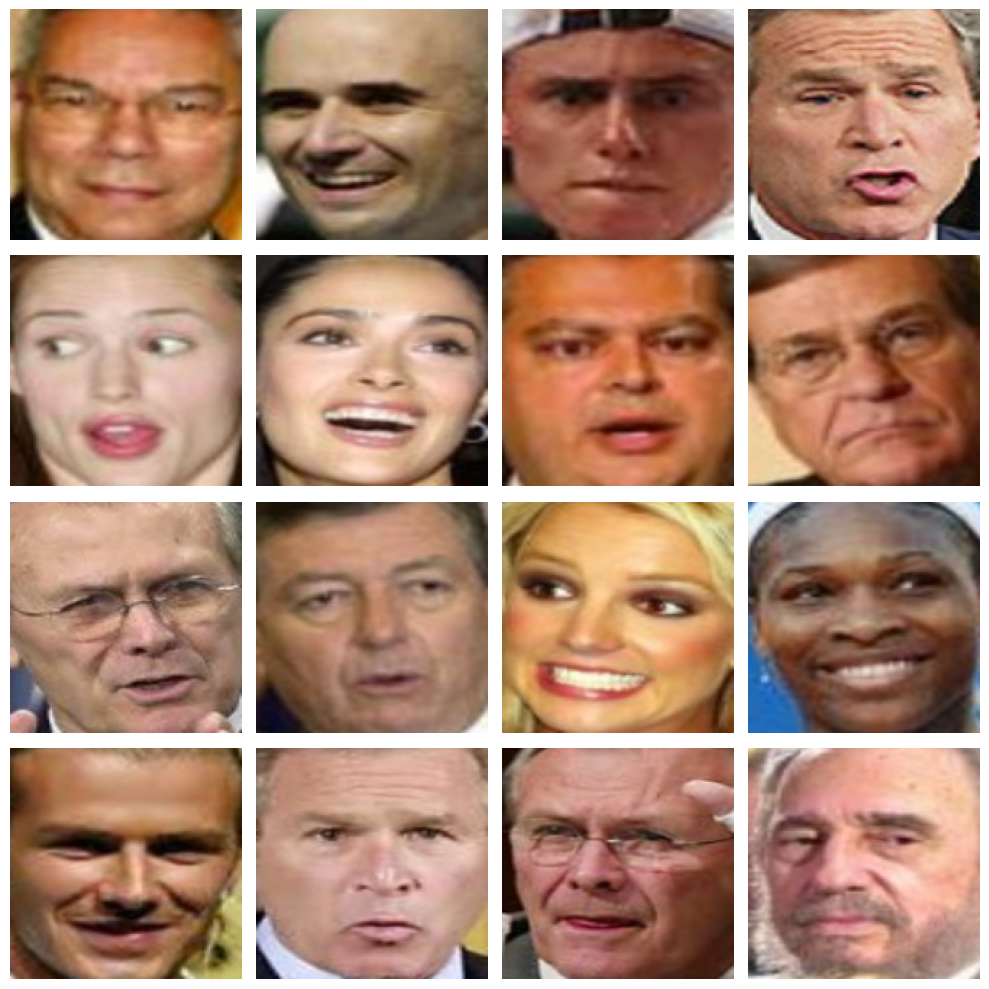

In [16]:
import random
plot_faces()

# Face recognition using FaceNet

In [17]:
!pip install keras-facenet

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=79cb0c9a9ea99f71a8aec36c9992bc62e3d28d81731c7fcbbf8f5f4852ded5d1
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [18]:
from keras_facenet import FaceNet

embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') #3D (160,160,3)
    face_img = np.expand_dims(face_img, axis=0) #4D (None,160,160,3)
    
    yhat = embedder.embeddings(face_img)
    
    return yhat[0]

In [ ]:
embedd_x = []

for img in X:
    embedd_x.append(get_embedding(img))
    
embedd_x = np.asarray(embedd_x)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━

In [20]:
np.savez_compressed('faces-embeddings.npz',embedd_x,Y)

In [21]:
Y

array(['Colin_Powell', 'Colin_Powell', 'Colin_Powell', ...,
       'Michael_Bloomberg', 'Michael_Bloomberg', 'Michael_Bloomberg'],
      dtype='<U25')

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(embedd_x, Y, shuffle= True, random_state = 42) 

In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [24]:
y_train # len(set(y_train)) = 158 ,So we have 158 classes

array([ 69,  10,  85, ..., 110,  24, 141])

In [25]:
y_test

array([35, 23, 67, ..., 35, 99,  3])

# SVM model

In [26]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [27]:
print(x_train.shape) 
print(y_train.shape)

(3243, 512)
(3243,)


In [28]:
train_ypreds = model.predict(x_train)
test_ypreds = model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_train, train_ypreds)

0.9895158803576934

In [31]:
accuracy_score(y_test, test_ypreds)

0.9870490286771508

In [32]:
test_img = cv.imread('/kaggle/input/vggface-using-tripletloss/dataset/dataset/Bill_Gates/Bill_Gates_0008.jpg')
test_img = cv.cvtColor(test_img, cv.COLOR_BGR2RGB) 
x,y,w,h = detector.detect_faces(test_img)[0]['box']
x,y = abs(x), abs(y)
test_image = test_img[y: y+h, x:x+w]
test_image = cv.resize(test_image, (160,160))
test_image = get_embedding(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [33]:
test_image.shape

(512,)

In [34]:
ypreds = model.predict([test_image])

In [35]:
ypreds

array([15])

In [36]:
# The output should be 'Bill_Gates'
encoder.inverse_transform(ypreds)[0]

'Bill_Gates'

Predicted: Bill_Gates
Expected: Bill_Gates


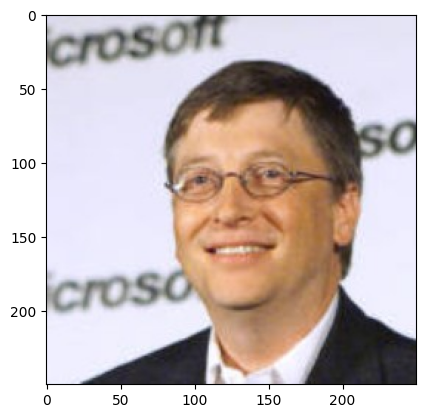

In [37]:
print(f'Predicted: {encoder.inverse_transform(ypreds)[0]}')
print('Expected: Bill_Gates')
# plot for fun
plt.imshow(test_img)
plt.show()